 José G. Portela

## In the coming lines of code, the following considerations were taken into account:"
To gather insights and facilitate the analysis, relevant libraries were imported, encompassing both those already employed and others potentially useful for the upcoming analysis. The datasets were individually loaded and named as measurements1 and measurements2, respectively.

A preliminary check was conducted to identify any missing values within the datasets. This step proved crucial, as it allowed us to evaluate the potential impact of missing values on the study. Both scenarios with and without missing values were examined to assess how these variations might influence the analysis.

Furthermore, the analysis considered the suitability of different libraries and methods, aiming to ensure a comprehensive and robust exploration of the datasets. This meticulous approach in library selection and missing value handling lays the groundwork for a more thorough and reliable analysis.

In [1]:
import pandas as pd
import os 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import chardet
from scipy import stats
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.seasonal import STL
from matplotlib.ticker import ScalarFormatter
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.api import STLForecast
from statsmodels.tsa.arima.model import ARIMA

In [2]:
measurements1 = pd.read_csv("../data/measurements.csv")
measurements2 = pd.read_excel("../data/measurements2.xlsx")

In [3]:
measurements1

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16,"3,7",39,"24,5",18,NaN,SP98,0,0,0,NaN,NaN
384,"16,1","4,3",38,25,31,AC,SP98,1,0,0,NaN,NaN
385,16,"3,8",45,25,19,NaN,SP98,0,0,0,NaN,NaN
386,"15,4","4,6",42,25,31,AC,SP98,1,0,0,NaN,NaN


In [4]:
measurements2

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45.0,E10
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,NaN,SP98,0,0,0,NaN,NaN
384,16.1,4.3,38,25.0,31,AC,SP98,1,0,0,NaN,NaN
385,16.0,3.8,45,25.0,19,NaN,SP98,0,0,0,NaN,NaN
386,15.4,4.6,42,25.0,31,AC,SP98,1,0,0,NaN,NaN


In [5]:
NaN = measurements1.isnull().sum()
TotalNaN = measurements1.isnull().sum().sum()
print(f"Missing values for each variable: {NaN}")
print(f"Total missing values: {TotalNaN}")

Missing values for each variable: distance           0
consume            0
speed              0
temp_inside       12
temp_outside       0
specials         295
gas_type           0
AC                 0
rain               0
sun                0
refill liters    375
refill gas       375
dtype: int64
Total missing values: 1057


In [6]:
NaN = measurements2.isnull().sum()
TotalNaN = measurements2.isnull().sum().sum()
print(f"Missing values for each variable: {NaN}")
print(f"Total missing values: {TotalNaN}")

Missing values for each variable: distance           0
consume            0
speed              0
temp_inside       12
temp_outside       0
specials         295
gas_type           0
AC                 0
rain               0
sun                0
refill liters    375
refill gas       375
dtype: int64
Total missing values: 1057


In [8]:
# Comparing data sets to confirm if the two data sets are the same or not

measurements_equal = measurements1.equals(measurements2)

if measurements_equal:
    print("Measurements from both data sets are the same.")
else:
    print("Measurements from both data sets are not the same.")

Measurements from both data sets are not the same.


In [ ]:
"""
Even though both measurement datasets have the same columns with 
missing values, it has been verified that they are not the same. 

"""

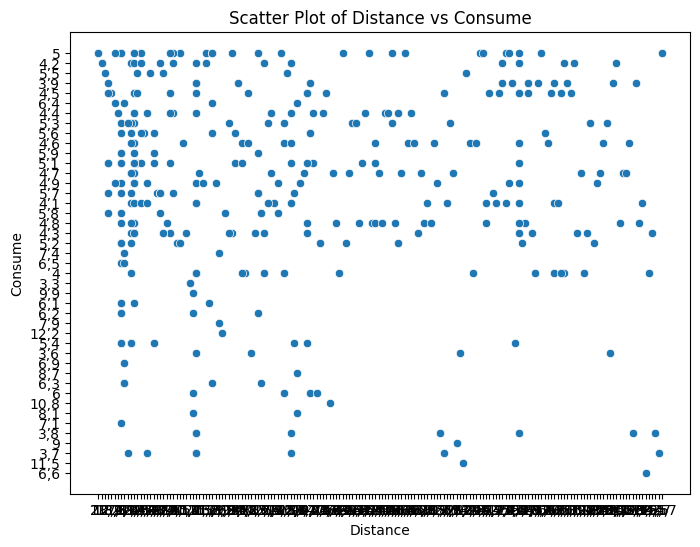

In [9]:
# A part of the analysis I'm verifying the relation bewteen 'distance' and 'consume'

# Scatter plot of 'distance' vs 'consume' in measurements1
plt.figure(figsize=(8, 6))
sns.scatterplot(x='distance', y='consume', data=measurements1)
plt.title('Scatter Plot of Distance vs Consume')
plt.xlabel('Distance')
plt.ylabel('Consume')
plt.show()


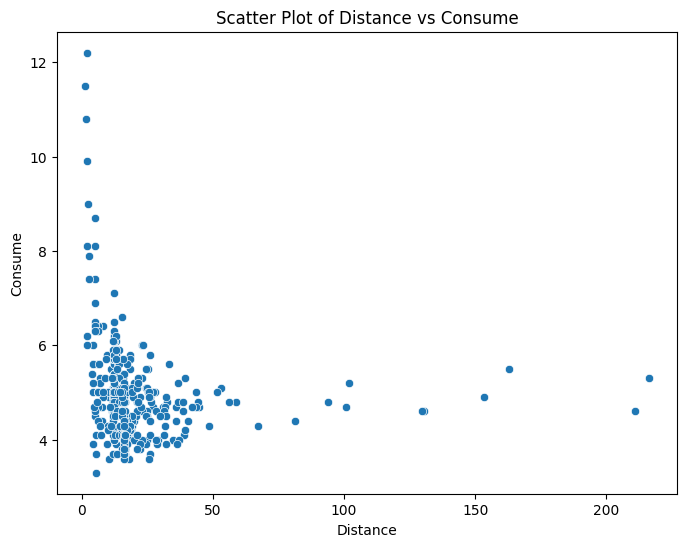

In [10]:
# Scatter plot of 'distance' vs 'consume' in measurements2
plt.figure(figsize=(8, 6))
sns.scatterplot(x='distance', y='consume', data=measurements2)
plt.title('Scatter Plot of Distance vs Consume')
plt.xlabel('Distance')
plt.ylabel('Consume')
plt.show()

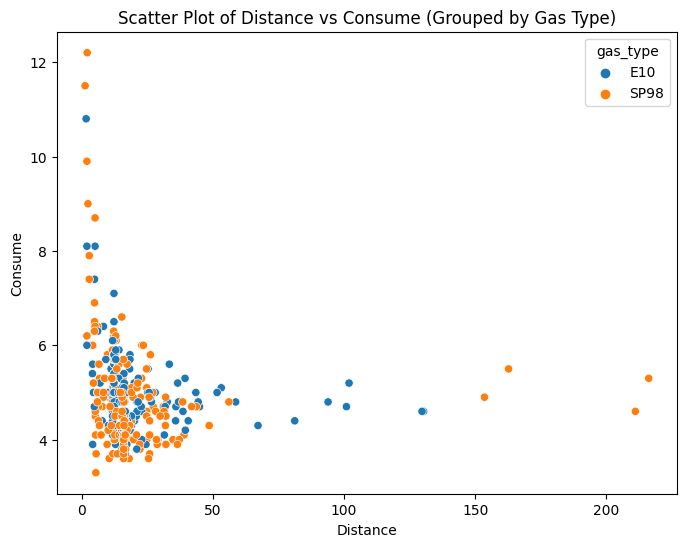

In [11]:
# Scatter plot of 'distance' vs 'consume' in measurements2
# Using markers to understand the possible association

plt.figure(figsize=(8, 6))
sns.scatterplot(x='distance', y='consume', hue='gas_type', data=measurements2)
plt.title('Scatter Plot of Distance vs Consume (Grouped by Gas Type)')
plt.xlabel('Distance')
plt.ylabel('Consume')
plt.show()

In [13]:
from scipy import stats
z_scores = stats.zscore(measurements2[['consume','distance']])
outliers = (z_scores > 3) | (z_scores < -3)
print(measurements2[outliers])


     distance  consume  speed  temp_inside  temp_outside specials gas_type  AC  rain  sun  refill liters refill gas
0         NaN      NaN    NaN          NaN           NaN      NaN      NaN NaN   NaN  NaN            NaN        NaN
1         NaN      NaN    NaN          NaN           NaN      NaN      NaN NaN   NaN  NaN            NaN        NaN
2         NaN      NaN    NaN          NaN           NaN      NaN      NaN NaN   NaN  NaN            NaN        NaN
3         NaN      NaN    NaN          NaN           NaN      NaN      NaN NaN   NaN  NaN            NaN        NaN
4         NaN      NaN    NaN          NaN           NaN      NaN      NaN NaN   NaN  NaN            NaN        NaN
..        ...      ...    ...          ...           ...      ...      ...  ..   ...  ...            ...        ...
383       NaN      NaN    NaN          NaN           NaN      NaN      NaN NaN   NaN  NaN            NaN        NaN
384       NaN      NaN    NaN          NaN           NaN      NaN      N

## Overall summary: 

1)- Dataset Discrepancy:
It has been observed that although the two datasets share identical columns and exhibit similar values, they are not identical. Discrepancies may exist in the data, and further investigation is necessary to understand the variations between the datasets.

2)- Outlier Detection using Z-Score:
Applying the z-score method revealed the presence of outliers in the dataset. Notably, one of the datasets contains string values, introducing a data type mismatch that may impact the analysis.

3)- Data Set Adjustments for Complex Studies:
The visualization highlights the need for potential adjustments to the datasets for more intricate analyses. Techniques such as imputing missing values using mean or median values could be considered. It is crucial to address any data inconsistencies or type disparities before proceeding with advanced studies.

4)- Visualization Insights:
Examination of the visualization indicates that, without alterations to the datasets, markers can be employed to identify associations within the second dataset (measurements2). Specifically, the 'distance' and 'consume' columns exhibit noteworthy connections when exploring different gas types. This insight underscores the importance of meticulous dataset preparation for accurate and meaningful visual interpretations.

In [24]:
#######################################################################################################################

We proceeded to clean both datasets and noticed that cleaning it wont help continuing the study since wont give us data to work with. 

Below there are code for scatter plot to visualize the problem.

In [14]:
dfc_measurements1 = measurements1.dropna()
dfc_measurements2 = measurements2.dropna()

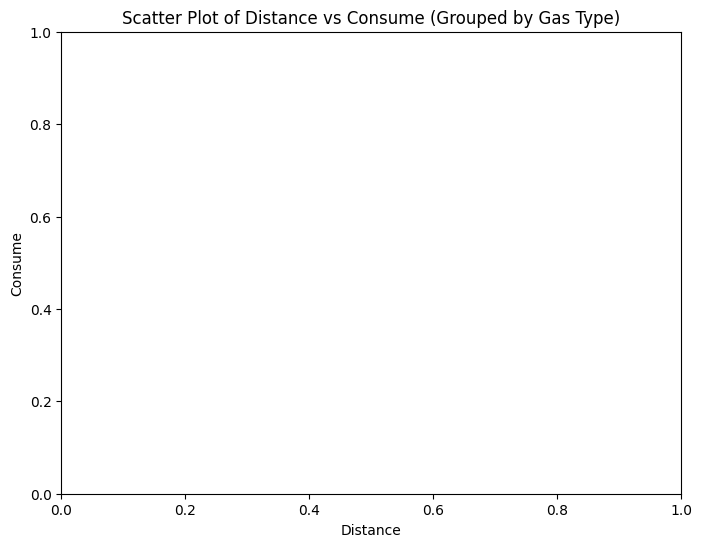

In [22]:
# Scatter plot of 'distance' vs 'consume' in measurements2
# Using markers to understand the possible association

plt.figure(figsize=(8, 6))
sns.scatterplot(x='distance', y='consume', hue='gas_type', data=dfc_measurements1)
plt.title('Scatter Plot of Distance vs Consume (Grouped by Gas Type)')
plt.xlabel('Distance')
plt.ylabel('Consume')
plt.show()

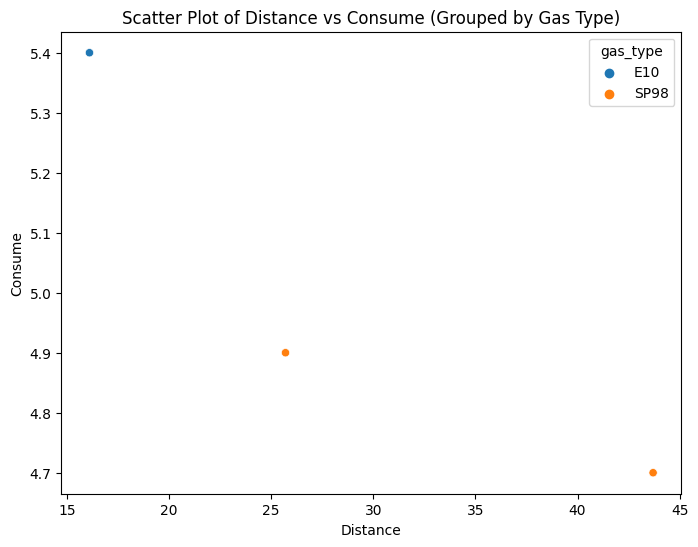

In [21]:
# Scatter plot of 'distance' vs 'consume' in measurements2
# Using markers to understand the possible association

plt.figure(figsize=(8, 6))
sns.scatterplot(x='distance', y='consume', hue='gas_type', data=dfc_measurements2)
plt.title('Scatter Plot of Distance vs Consume (Grouped by Gas Type)')
plt.xlabel('Distance')
plt.ylabel('Consume')
plt.show()